In [40]:
import pandas as pd
df = pd.read_csv('insurance.csv')
df = df.drop(list(df.columns[2:7]),axis=1)
df.columns = df.iloc[0]
df = df.drop([0],axis=0)
df.head(4)

,X,Y
1,108,"392,5"
2,19,"46,2"
3,13,"15,7"
4,124,"422,2"


**In the following data**

X = number of claims

Y = total payment for all the claims in thousands of Swedish Kronor

for geographical zones in Sweden

In [41]:
df['Y'] = df['Y'].str.replace(',','.')
df.head(3)

,X,Y
1,108,392.5
2,19,46.2
3,13,15.7


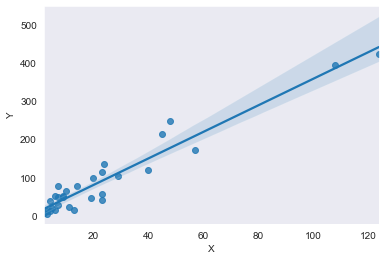

In [42]:
# The data type of X and Y is 'object' convert into 'float'
df['X'] = df['X'].astype(float)
df['Y'] = df['Y'].astype(float)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
sns.regplot(x ='X',y ='Y',data=df.head(30))
plt.show()
# from the scatter plot we can see that x and y have linear relationship

***The line for a simple linear regression model can be written as:***

**Y = B0 + B1*X**

where B0 and B1 are the coefficients we must estimate from the training data.

Once the coefficients are known, we can use this equation to estimate output values for y given new input examples of x.

In [43]:
# Mean and variance
def mean(values):
    return sum(values)/float(len(values))

def variance(values, mean):
    return sum([(x-mean)**2 for x in values])/float(len(values))


In [44]:
# Covariance
# The covariance of two groups of numbers describes how those numbers change together.

def covariance(x,mean_x,y,mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
        return covar/float(len(x))  

**We now have all the pieces in place to calculate the coefficients for our model.**

# Estimate Coefficients

In [45]:
# coefficients B0 and B1
def coefficients(dataset):
    x = dataset.iloc[:, 0]. tolist()
    y = dataset.iloc[:, 1]. tolist()
    x_mean, y_mean = mean(x), mean(y)
    B1 = covariance(x,x_mean,y,x_mean)/variance(x,x_mean)
    B0 = y_mean - B1*x_mean
    return [B0,B1]

In [46]:
coefficients(df)

[76.88043552375885, 0.9302373957056081]

# Splitting the dataset to Train and Test

In [47]:
# shuffle your dataset
df_shuffle = df.sample(frac=1)

#Define a size for your train set
train_size = int(0.7*len(df))

# Split the dataset 70:30 ratio
Train_df = df_shuffle[:train_size]
Test_df = df_shuffle[train_size:]

In [48]:
coefficients(Train_df)

[99.52893082288664, 0.01630822796042945]

# Simple Linear regression algorithm

In [49]:
def SLR(train,test):
    a = test.iloc[:, 0]. tolist() # values of x in test df in list form
    predict = list() # values of y will also be predictated in list form
    b0, b1 = coefficients(train)
    for row in a:
        y_predict = b0 + b1 * row
        predict.append(y_predict)
    return predict

In [50]:
pd.DataFrame(SLR(Train_df,Test_df))
# predicted Y values from x values in test dataset

,0
0,100.523733
1,99.969253
2,99.806171
3,99.675705
4,99.708321
5,99.708321
6,99.594164
7,99.675705
8,99.561547
9,99.675705


# Ploting predictions to compare it to the original dataset.


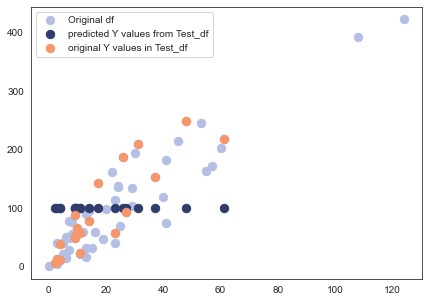

In [51]:
import matplotlib.pyplot as plt

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

sns.set_style("white")
fig1 = plt.figure(figsize=(7,5))
ax1 = fig1.add_subplot()
ax2 = fig1.add_subplot()

x=df['X']
y=df['Y']

a = Test_df['X']
c = Test_df['Y']
b = SLR(Train_df,Test_df)

# plt.xlim([0, 70])
# plt.ylim([0, 300])


plt.scatter(x,y,s=70,color='#B4BFE5',label="Original df")
ax1.scatter(a,b,color='#303C6C',s=70,label="predicted Y values from Test_df")
ax2.scatter(a,c,color='#F4976C',s=70,label="original Y values in Test_df")

plt.legend()

**Fron the graph it can be seen that there are few "Outliners" which could effect the loss function**

# Calculating the Loss function : RMSE

In [52]:
# from RMSE formula
from math import sqrt
def RMSE(actual,prediction):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = actual[i] - prediction[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error/float(len(actual))
    return sqrt(mean_error)

In [53]:
RMSE(list(Test_df['Y']),SLR(Train_df,Test_df))

73.85096611333712

**RMSE is the distance on average of a data point from the fitted line, measured along a vertical line**

**The high value of RMSE is due the outliners**

# Calculating R^2 

In [54]:
def R2(actual,prediction):
    RSS = 0.0
    TSS = 0.0
    for i in range(len(actual)):
        predict_error = actual[i] - prediction[i]
        RSS += (predict_error ** 2)
        tss_error = actual[i] - mean(actual)
        TSS += (tss_error ** 2)
    return 1 - (RSS/TSS)

In [55]:
R2(list(Test_df['Y']),SLR(Train_df,Test_df))

0.00019362794105914904

**R-squared is a goodness-of-fit measure for linear regression models,**
**higher variability around the regression line produces a lower R-squared value.**

**A low R-squared value indicates that your independent variable is not explaining much in the variation of your dependent variable**

In [56]:
# IF we remove this Outliners it would result in less value os RMSE
# NOTE: Removing outliers is legitimate only for specific reasons.
# We are only removing outliners here for understanding Loss function and what causes it

In [57]:
df1 = Test_df[Test_df['Y'] > 50] 
df1 = Test_df[Test_df['Y'] < 150]

In [58]:
del SLR(Train_df,Test_df)[0:6]

In [59]:
RMSE(list(df1['Y']),SLR(Train_df,Test_df))

57.120716144916464